In [1]:
# Importação do csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
# import umap

df = pd.read_csv('./data/covid_cities_features.csv')

# Tratamento inicial

In [2]:
df.head()

,city,state,total_cases,mean_cases,std_cases,total_deaths,mean_deaths,std_deaths,days_recorded,death_rate,mean_daily_growth,days_until_first_case
0,Abadia de Goiás,GO,1351.0,558.153664,426.181817,28,7.565012,7.530658,423,0.020725,3.193853,55
1,Abadia dos Dourados,MG,375.0,118.761229,119.465862,14,2.687943,4.138253,423,0.037333,0.886525,42
2,Abadiânia,GO,400.0,147.659574,105.898626,27,10.801418,8.029761,423,0.067500,0.945626,63
3,Abaetetuba,PA,7659.0,3646.444444,2098.725146,210,104.628842,48.581654,423,0.027419,18.106383,4
4,Abaeté,MG,1019.0,248.574468,312.806079,26,5.224586,6.855251,423,0.025515,2.408983,16


In [3]:
# Removendo cidade
df.drop('city', axis=1, inplace=True)

In [ ]:
# # Agrupando `state` por regiões
# map_regions = {
#   'North': ['AM', 'PA', 'AP', 'RO', 'RR', 'AC', 'TO'],
#   'Northeast': ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'],
#   'Central-West': ['MT', 'MS', 'GO', 'DF'],
#   'Southeast': ['SP', 'RJ', 'ES', 'MG'],
#   'South': ['PR', 'RS', 'SC']
# }

# state_to_region = {state: region for region, states in map_regions.items() for state in states}

# regions = df['state'].map(state_to_region)
# df.insert(0, 'region', regions)

In [ ]:
# # Dropando coluna `state`
# df.drop('state', axis=1, inplace=True)

In [ ]:
# # Aplicando one-hot encode no campo `state` para transformar em `region`
# df = pd.get_dummies(df, columns=['region'])
# hot_encode_names = {
#   'region_North': 'North',
#   'region_Northeast': 'Northeast',
#   'region_Central-West': 'Central-West',
#   'region_Southeast': 'Southeast',
#   'region_South': 'South',
# }

# df = df.rename(columns=hot_encode_names)

In [4]:
# NOVO
# Aplicando one-hot encode no campo `state`
df = pd.get_dummies(df, columns=['state'])

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cases            5570 non-null   float64
 1   mean_cases             5570 non-null   float64
 2   std_cases              5570 non-null   float64
 3   total_deaths           5570 non-null   int64  
 4   mean_deaths            5570 non-null   float64
 5   std_deaths             5570 non-null   float64
 6   days_recorded          5570 non-null   int64  
 7   death_rate             5570 non-null   float64
 8   mean_daily_growth      5570 non-null   float64
 9   days_until_first_case  5570 non-null   int64  
 10  state_AC               5570 non-null   bool   
 11  state_AL               5570 non-null   bool   
 12  state_AM               5570 non-null   bool   
 13  state_AP               5570 non-null   bool   
 14  state_BA               5570 non-null   bool   
 15  state_CE       

In [7]:
# Normalização
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Redução de dimensionalidade

In [8]:
# PCA
# Plotando PCA para visualização

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

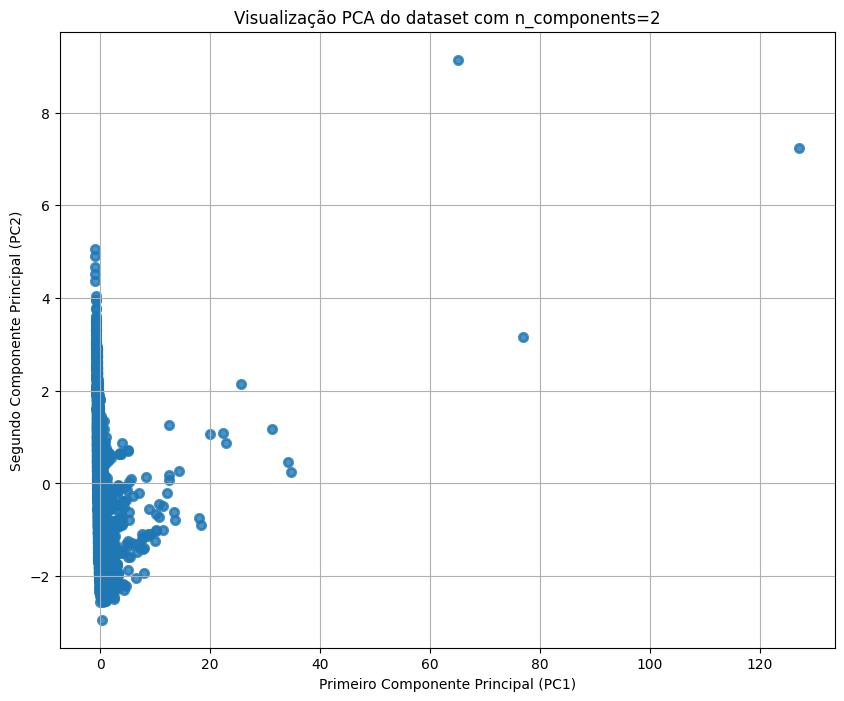

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=.8, lw=2)
plt.title('Visualização PCA do dataset com n_components=2')
plt.xlabel('Primeiro Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.grid(True)
plt.show()

In [ ]:
# t-SNE

In [10]:
def plot_tsne(df_tsne, perp: int | float):
  plt.figure(figsize=(10, 8))
  plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=.8, lw=0)
  plt.title(f'Visualização t-SNE do dataset com n_components=2 e perplexity={perp}')
  plt.xlabel('Componente t-SNE 1')
  plt.ylabel('Componente t-SNE 2')
  plt.grid(True)
  plt.show()

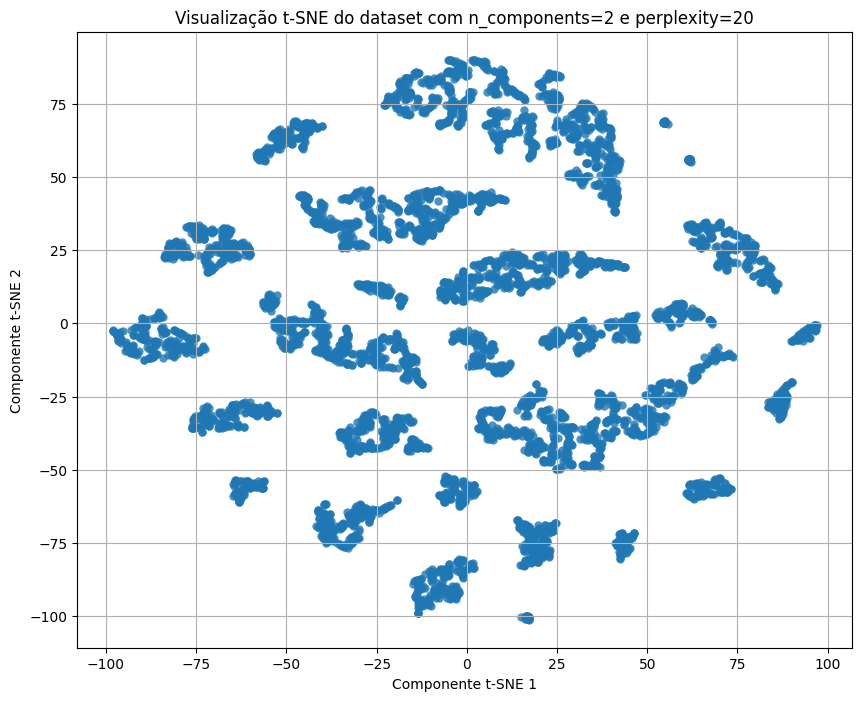

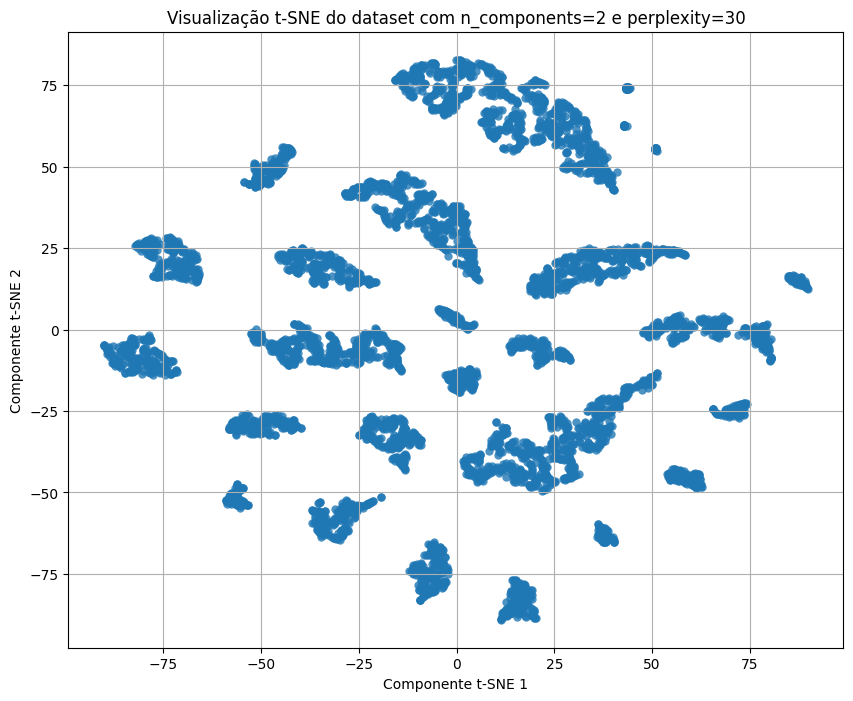

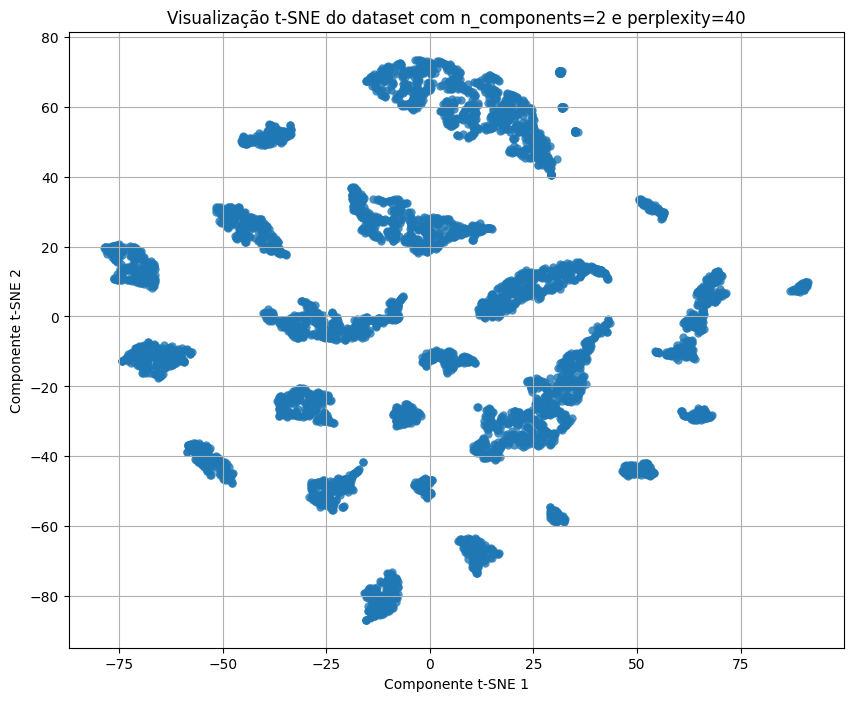

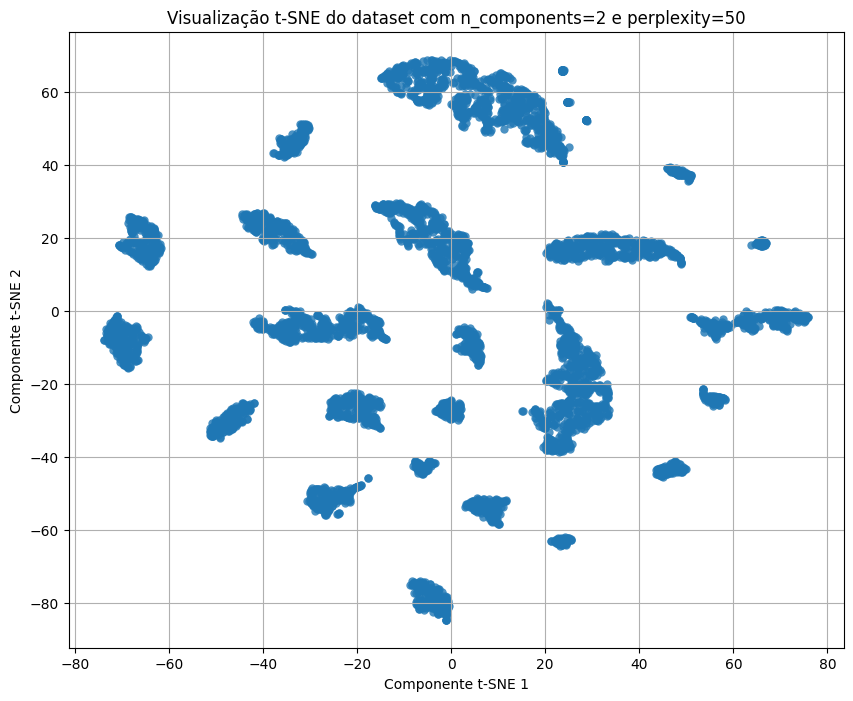

In [11]:
tsne_results = dict()
for perp in [20, 30, 40, 50]:
  tsne = TSNE(n_components=2, perplexity=perp, max_iter=1000, learning_rate=200)
  df_tsne = tsne.fit_transform(df_scaled)
  tsne_results[perp] = df_tsne
  plot_tsne(df_tsne, perp)

In [12]:
# Pegando o melhor resultado do t-SNE
df_tsne = tsne_results[50]

In [13]:
# Como a melhor redução até agora foi feita com t-SNE, utilizaremos ele para clusterização
df_cluster = df_tsne

In [14]:
# k-means
def plot_kmeans(kmeans: KMeans):
  kmeans_centroids = kmeans.cluster_centers_
  kmeans_labels = kmeans.labels_
  plt.figure(figsize=(10,8))
  plt.scatter(df_cluster[:, 0], df_cluster[:, 1], c=kmeans_labels, s=50, cmap='viridis', edgecolor='k')
  plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=250, edgecolor='black', label='Centróides')
  plt.title('Clusters Encontrados pelo K-Means')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.grid(True)
  plt.show()

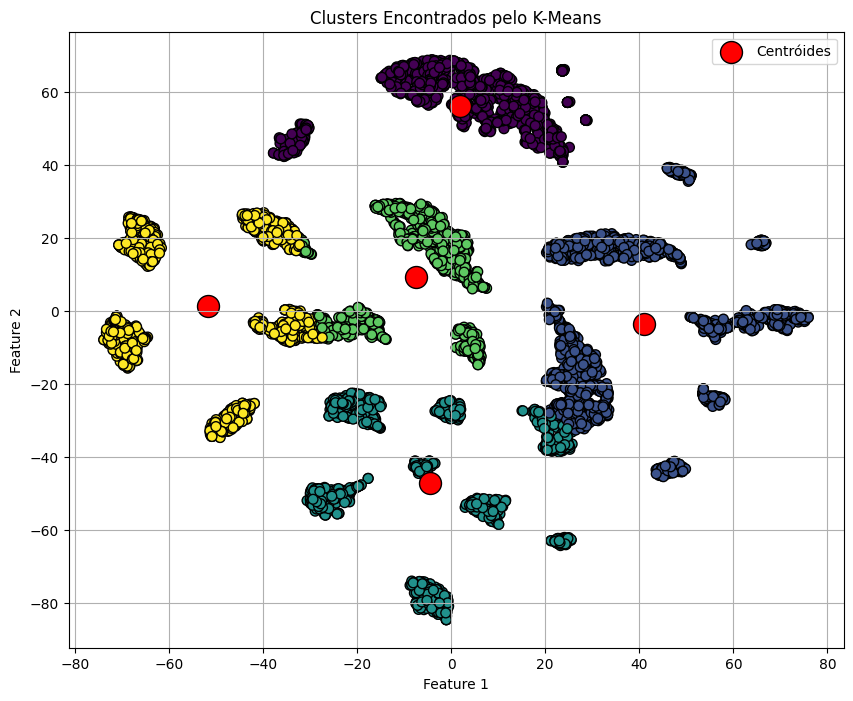

In [15]:
kmeans = KMeans(n_clusters=5, max_iter=500, random_state=42)
kmeans.fit(df_tsne)
plot_kmeans(kmeans)


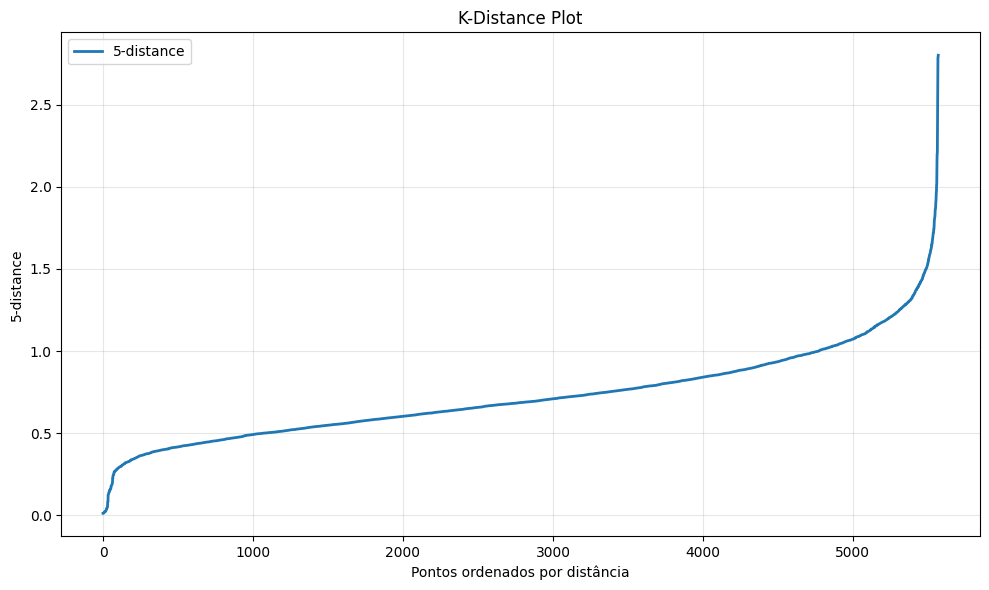

In [16]:
# DBSCAN
def plot_k_distance(df, min_pts, title="K-Distance Plot"):
  k = int(min_pts - 1)                                                        # (minPts-1)-ésimo vizinho (excluindo p)

  nn = NearestNeighbors(n_neighbors=k+1, metric="euclidean")                  # k+1 vizinhos porque o 1º vizinho de um ponto é ele mesmo (distância 0)
  nn.fit(df)                                                                   # “treina” o buscador: constrói a estrutura de vizinhança
  distances, _ = nn.kneighbors(df)                                             # retorna distâncias para os k+1 vizinhos de cada ponto; '_' ignora os índices dos vizinhos

  kth_distances = distances[:, k]                                             # pega a distância do k-ésimo vizinho (coluna k, indexação 0-based) para cada ponto
  k_distances_sorted = np.sort(kth_distances)                                 # ordena as k-distâncias

  # Plot
  plt.figure(figsize=(10, 6))                                                 # cria uma figura com tamanho fixo para boa legibilidade
  plt.plot(range(len(k_distances_sorted)), k_distances_sorted, linewidth=2,   # plota k-distâncias em ordem crescente; procurar o “cotovelo” para sugerir eps
            label=f'{k}-distance')
  plt.xlabel("Pontos ordenados por distância")                                # eixo x: índice após ordenar (não é um atributo do dataset)
  plt.ylabel(f"{k}-distance")                                                 # eixo y: distância ao k-ésimo vizinho mais próximo
  plt.title(title)                                                            # título configurável para reuso em diferentes datasets/minPts
  plt.grid(True, alpha=0.3)                                                   # grade leve para facilitar a leitura do “cotovelo”
  plt.legend()                                                                # legenda com o valor de k usado no gráfico
  plt.tight_layout()                                                          # ajusta espaçamentos para evitar cortes de textos/labels
  plt.show()


plot_k_distance(df_cluster, 6)

In [17]:
def plot_dbscan(dbscan: DBSCAN):
  labels = dbscan.fit_predict(df_cluster)
  display(labels)
  # cmap = cm.get_cmap('viridis')
  # viridis = [cmap(i / 6) for i in range(6)]
  plt.figure(figsize=(10,8))
  plt.scatter(df_cluster[:, 0], df_cluster[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
  # plt.scatter(kmeans_centroids[:, 0], dbscan_centroids[:, 1], c='red', s=250, edgecolor='black', label='Centróides')
  plt.title('Clusters Encontrados pelo DBSCAN')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.grid(True)
  plt.show()
  return labels

array([ 0,  1,  0, ...,  4,  2, 14], shape=(5570,))

/tmp/ipykernel_4284/3052401504.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


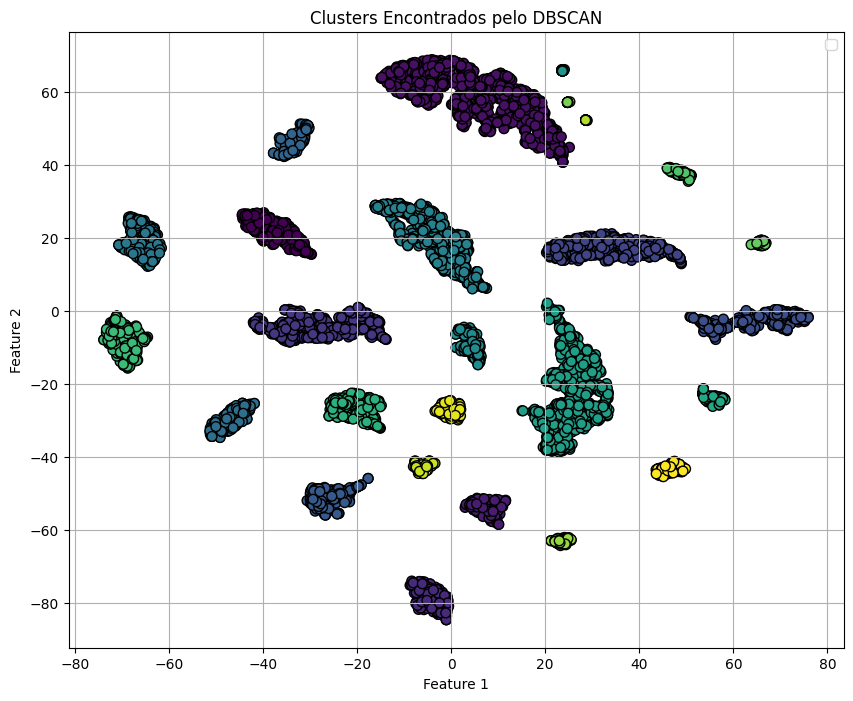

In [18]:
# dbscan = DBSCAN(eps=2.0, min_samples=6)
dbscan = DBSCAN(eps=2.6, min_samples=6)
labels = plot_dbscan(dbscan)


In [28]:
df['label'] = pd.Series(labels)

In [30]:
# Dataframe com label
df

,total_cases,mean_cases,std_cases,total_deaths,mean_deaths,std_deaths,days_recorded,death_rate,mean_daily_growth,days_until_first_case,Central-West,North,Northeast,South,Southeast,label
0,1351.0,558.153664,426.181817,28,7.565012,7.530658,423,0.020725,3.193853,55,True,False,False,False,False,0
1,375.0,118.761229,119.465862,14,2.687943,4.138253,423,0.037333,0.886525,42,False,False,False,False,True,1
2,400.0,147.659574,105.898626,27,10.801418,8.029761,423,0.067500,0.945626,63,True,False,False,False,False,0
3,7659.0,3646.444444,2098.725146,210,104.628842,48.581654,423,0.027419,18.106383,4,False,True,False,False,False,2
4,1019.0,248.574468,312.806079,26,5.224586,6.855251,423,0.025515,2.408983,16,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,202.0,53.307329,58.444733,3,0.754137,1.095478,423,0.014851,0.477541,51,False,False,False,True,False,4
5566,283.0,88.886525,90.399673,6,1.465721,1.509255,423,0.021201,0.669031,60,False,False,False,True,False,4
5567,235.0,60.338061,81.674372,2,0.846336,0.955170,423,0.008511,0.555556,75,False,False,True,False,False,3
5568,6049.0,2496.177305,1930.441608,112,42.179669,32.105806,423,0.018515,14.300236,19,False,True,False,False,False,2
